# Project 1
### Seijung Kim (sk591)
This notebook combines data loading, statistics, visualization, and testing for the Amazon product sales dataset.
It uses the nbval package to run the assert statements during the CI/CD process

# Create Statistics and Visualization

In [1]:
# Import necessary libraries and functions
import os
import polars as pl
from lib import load_dataset, statistics, category_counts, visualization, generate_pdf
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Ensure the images directory exists
if not os.path.exists("images"):
    os.makedirs("images")

In [3]:
# Use the load_dataset function from lib.py
data_path = "Amazon-Products-100k.csv"
df = load_dataset(data_path)
df.head(10)

number,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
i64,str,str,str,str,str,f64,i64,f64,f64
0,"""Lloyd 1.5 Ton 3 Star Inverter …","""appliances""","""Air Conditioners""","""https://m.media-amazon.com/ima…","""https://www.amazon.in/Lloyd-In…",4.2,2255,32999.0,58990.0
1,"""LG 1.5 Ton 5 Star AI DUAL Inve…","""appliances""","""Air Conditioners""","""https://m.media-amazon.com/ima…","""https://www.amazon.in/LG-Conve…",4.2,2948,46490.0,75990.0
2,"""LG 1 Ton 4 Star Ai Dual Invert…","""appliances""","""Air Conditioners""","""https://m.media-amazon.com/ima…","""https://www.amazon.in/LG-Inver…",4.2,1206,34490.0,61990.0
3,"""LG 1.5 Ton 3 Star AI DUAL Inve…","""appliances""","""Air Conditioners""","""https://m.media-amazon.com/ima…","""https://www.amazon.in/LG-Conve…",4.0,69,37990.0,68990.0
4,"""Carrier 1.5 Ton 3 Star Inverte…","""appliances""","""Air Conditioners""","""https://m.media-amazon.com/ima…","""https://www.amazon.in/Carrier-…",4.1,630,34490.0,67790.0
5,"""Voltas 1.4 Ton 3 Star Inverter…","""appliances""","""Air Conditioners""","""https://m.media-amazon.com/ima…","""https://www.amazon.in/Voltas-A…",4.0,1666,31990.0,70990.0
6,"""Lloyd 1.0 Ton 3 Star Inverter …","""appliances""","""Air Conditioners""","""https://m.media-amazon.com/ima…","""https://www.amazon.in/Lloyd-In…",4.2,1097,29999.0,49990.0
7,"""Lloyd 1.5 Ton 5 Star Inverter …","""appliances""","""Air Conditioners""","""https://m.media-amazon.com/ima…","""https://www.amazon.in/Lloyd-In…",4.3,1494,39990.0,67990.0
8,"""Carrier 1 Ton 3 Star AI Flexic…","""appliances""","""Air Conditioners""","""https://m.media-amazon.com/ima…","""https://www.amazon.in/Carrier-…",4.1,674,30990.0,58190.0


In [4]:
# Calculate statistics using the imported function
stats_df = statistics(df)
stats_df

,main_category,mean_ratings,median_ratings,std_ratings,mean_no_of_ratings
0,accessories,3.998446,4.0,0.591087,376.843431
1,appliances,3.927121,4.0,0.550633,846.310788
2,bags & luggage,3.892389,4.1,0.860248,929.589852
3,beauty & health,4.067159,4.1,0.424399,1205.887183
4,car & motorbike,3.724784,3.8,0.801004,289.552207
5,grocery & gourmet foods,4.167962,4.2,0.323828,900.336461
6,home & kitchen,3.997894,4.0,0.555351,1853.567736
7,kids' fashion,3.855261,3.9,0.800178,141.089478
8,men's shoes,3.568305,3.7,0.877606,200.338428
9,pet supplies,4.002957,4.1,0.602119,817.123845


In [5]:
# Calculate category counts using the imported function
main_category_counts, sub_category_counts = category_counts(df)
main_category_counts, sub_category_counts

(              main_category  counts
 0               accessories   15961
 1                appliances    9019
 2            bags & luggage     473
 3           beauty & health    1693
 4           car & motorbike    4281
 5   grocery & gourmet foods     746
 6            home & kitchen    2089
 7             kids' fashion    1207
 8               men's shoes   10011
 9              pet supplies     541
 10         sports & fitness    2819
 11                   stores    1985
 12     toys & baby products    2014
 13      tv, audio & cameras   24567
 14            women's shoes     332,
                       sub_category  counts
 0                 Air Conditioners     321
 1                   All Appliances    8698
 2     All Car & Motorbike Products    1104
 3                  All Electronics    9002
 4           All Exercise & Fitness     987
 5      All Grocery & Gourmet Foods     746
 6               All Home & Kitchen    1132
 7                 All Pet Supplies     541
 8   All Sp

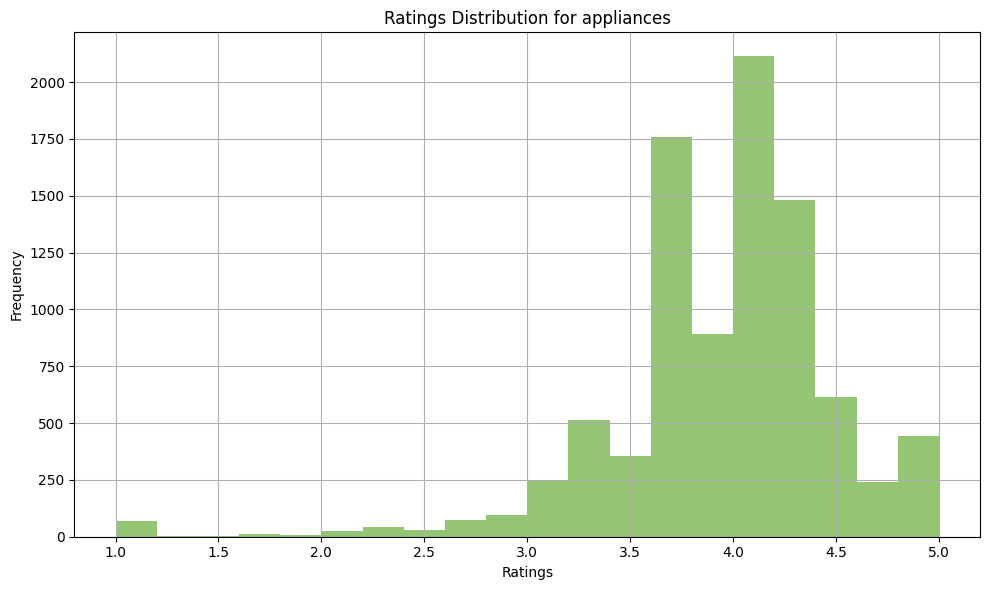

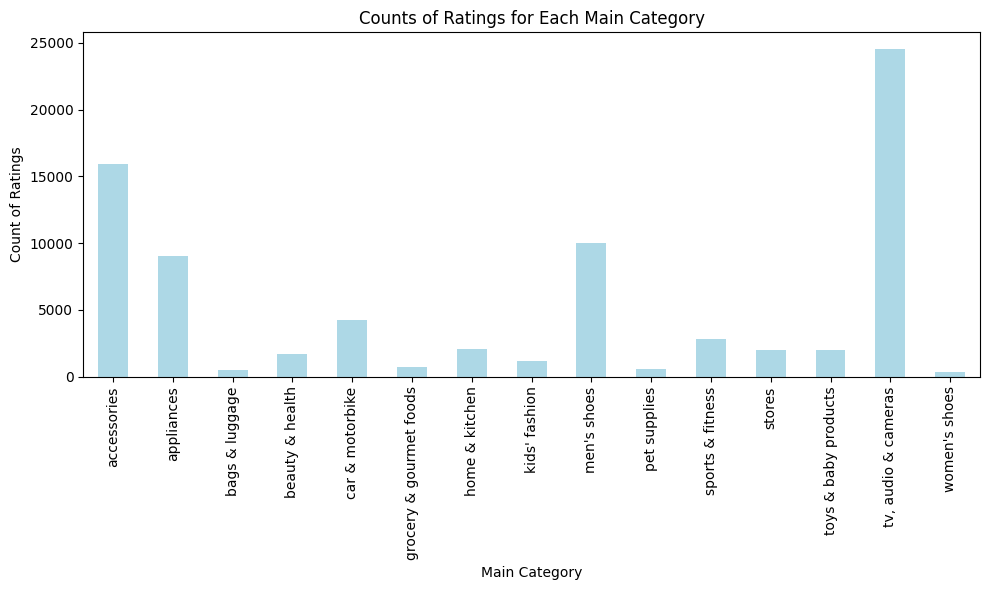

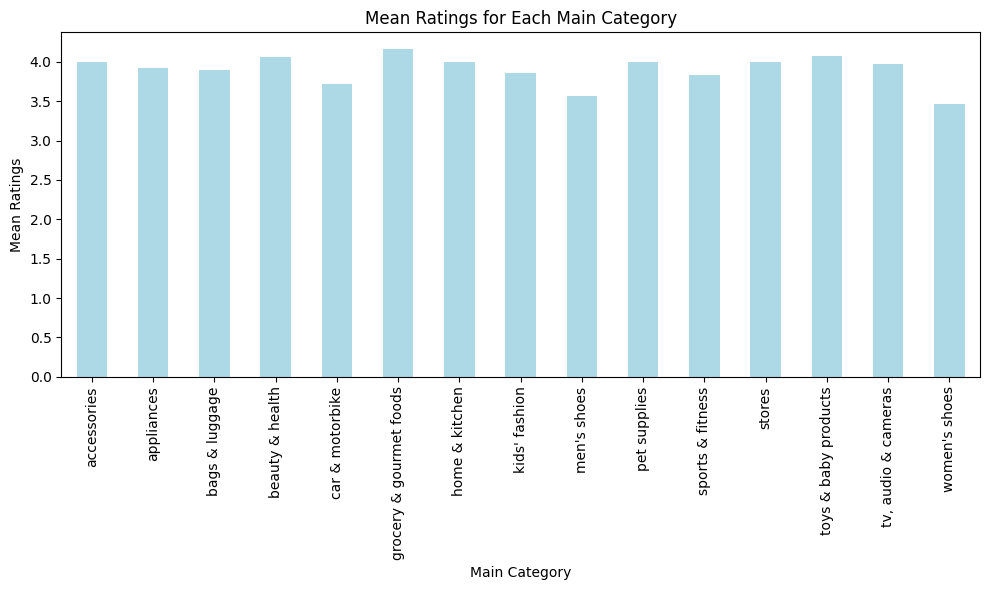

In [6]:
# Convert Polars DataFrame to Pandas if it is still a Polars DataFrame
if isinstance(df, pl.DataFrame):
    df = df.to_pandas()

# Histogram of ratings for one of the main categories
first_category = df["main_category"].unique()[0]  # Get the first
subset = df[df["main_category"] == first_category]
plt.figure(figsize=(10, 6))
subset["ratings"].hist(bins=20, color="#93C572")
plt.title(f"Ratings Distribution for {first_category}")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.tight_layout()  # Prevents labels from being cut off
plt.show()

# Bar graph: counts of ratings for each main category
plt.figure(figsize=(10, 6))
ratings_counts = df.groupby("main_category")["ratings"].count()
ratings_counts.plot(kind="bar", color="#ADD8E6")
plt.title("Counts of Ratings for Each Main Category")
plt.xlabel("Main Category")
plt.ylabel("Count of Ratings")
plt.tight_layout()  # Prevents labels from being cut off
plt.show()

# Bar graph: mean ratings for each main category
plt.figure(figsize=(10, 6))
mean_ratings = df.groupby("main_category")["ratings"].mean()
mean_ratings.plot(kind="bar", color="#ADD8E6")
plt.title("Mean Ratings for Each Main Category")
plt.xlabel("Main Category")
plt.ylabel("Mean Ratings")
plt.tight_layout()  # Prevents labels from being cut off
plt.show()

# Testing with nbval

In [7]:
# Sample inline data as a string for testing
inline_data = (
    "main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price\n"
    "Electronics,Mobile Phones,4.5,200,500.0,700.0\n"
    "Electronics,Laptops,4.0,150,1000.0,1200.0\n"
    "Home Appliances,Refrigerators,3.8,100,300.0,500.0\n"
    "Home Appliances,Washing Machines,4.2,80,400.0,600.0\n"
)

# Convert the inline CSV string to a Polars DataFrame
df = pl.read_csv(inline_data.encode(), null_values=["null", ""])
df

main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
str,str,f64,i64,f64,f64
"""Electronics""","""Mobile Phones""",4.5,200,500.0,700.0
"""Electronics""","""Laptops""",4.0,150,1000.0,1200.0
"""Home Appliances""","""Refrigerators""",3.8,100,300.0,500.0
"""Home Appliances""","""Washing Machines""",4.2,80,400.0,600.0


In [9]:
# Test loading data
assert df.shape == (4, 6), "DataFrame should have 4 rows and 6 columns"

# Perform statistics for the inline data
stats_df = statistics(df)

# Test statistics
assert "mean_ratings" in stats_df.columns, "Mean ratings should be calculated"
assert "median_ratings" in stats_df.columns, "Median ratings should be calculated"

# Perform category counts for the inline data
main_category_counts, sub_category_counts = category_counts(df)

# Test category counts
assert len(main_category_counts) == 2, "There should be two main categories"
assert len(sub_category_counts) == 4, "There should be four subcategories"

# Create visualizations for the inline data
visualization(df)

# Test visualizations: Check if the visualizations are saved
assert os.path.exists(
    "images/main_category_ratings_count_bar_chart.png"
), "Bar chart should be saved"
assert os.path.exists(
    "images/main_category_mean_ratings_bar_chart.png"
), "Mean ratings chart should be saved"

# Check for the first category's histogram
first_category = df["main_category"][0]
histogram_path = f"images/{first_category}_ratings_histogram.png"
assert os.path.exists(histogram_path), f"Histogram {first_category} should save"

# Ensure the test_outputs directory exists
os.makedirs("test_outputs", exist_ok=True)

# Generate PDF report for the inline data in the test directory
test_pdf_path = "test_outputs/Amazon_Sales_Report_test.pdf"
generate_pdf(
    main_category_counts, sub_category_counts, stats_df, pdf_path=test_pdf_path
)

# Test PDF generation
assert os.path.exists(test_pdf_path), "Test PDF should be generated"

PDF report generated: test_outputs/Amazon_Sales_Report_test.pdf
